# Natural Language Processing

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('D:/Test/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [ ]:
dataset

In [ ]:
dataset.shape

In [ ]:
# library to clean data
import re

# Natural Language Tool Kit
import nltk

nltk.download('stopwords')

# to remove stopword
from nltk.corpus import stopwords

# for Stemming propose
from nltk.stem.porter import PorterStemmer

# Initialize empty array
# to append clean text
corpus = []

# 1000 (reviews) rows to clean
for i in range(0, 1000):
	
	# column : "Review", row ith
	review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
	
	# convert all cases to lower cases
	review = review.lower()
	
	# split to array(default delimiter is " ")
	review = review.split()
	
	# creating PorterStemmer object to
	# take main stem of each word
	ps = PorterStemmer()
	
	# loop for stemming each word
	# in string array at ith row
	review = [ps.stem(word) for word in review
				if not word in set(stopwords.words('english'))]
				
	# rejoin all string array elements
	# to create back into a string
	review = ' '.join(review)
	
	# append each string to create
	# array of clean text
	corpus.append(review)


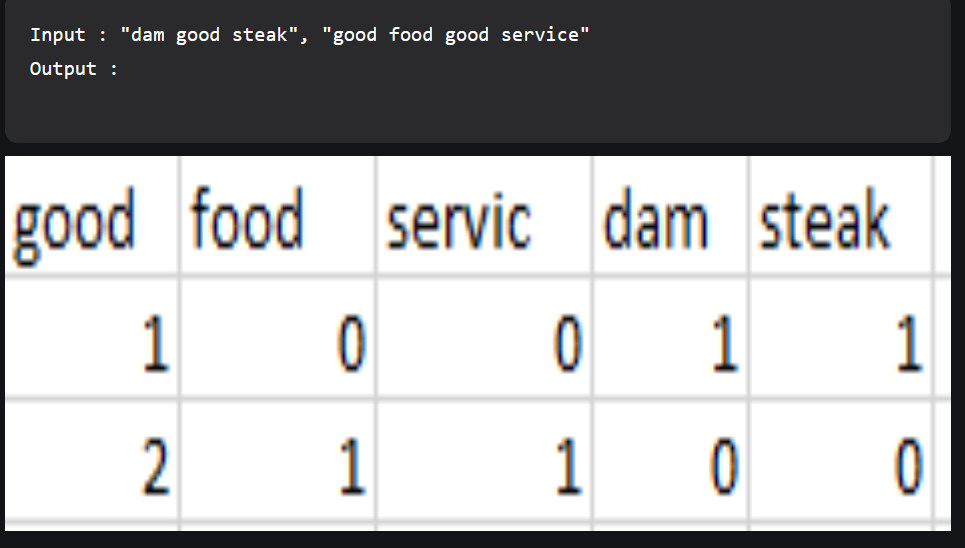

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values


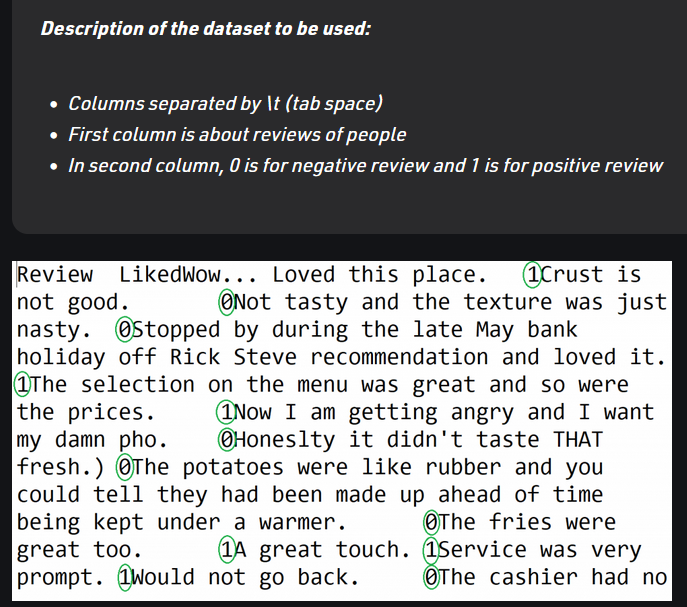

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [ ]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier

# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results
model = RandomForestClassifier(n_estimators = 501,
							criterion = 'entropy')
							
model.fit(X_train, y_train)


In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

y_pred


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)

cm


In [ ]:
accuracy_score(y_test, y_pred)